### Area Plots

Before we get deep into plotting, let's load the data and get it ready for us (more details on this data importing and wrangling can be found in *Course Visualizing Data with Python MOD1*).

Let's start with importing *pandas* and *numpy*.

In [1]:
import numpy as np
import pandas as pd

In [3]:
#reading the dataset
df_can=pd.read_excel('~/Documents/Cambridge/Python-Lessons/Canada.xlsx',
                    sheet_name='Canada by Citizenship',
                    skiprows=range(20),
                    skipfooter=2
                    )
df_can.head(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Next, we will delete some columns that will not be useful for us:

In [4]:
#dropping labels from the column, axis=1
#updating the dataset with inplace=True
df_can.drop(['AREA','REG','DEV','Type','Coverage'],axis=1,inplace=True) 
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Change the name of some of the columns:

In [5]:
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)
df_can.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


For plotting, we will need that all the column names are of *string* data type. First let's check if all our column names are strings already:

In [6]:
all(isinstance(column,str) for column in df_can.columns)

False

This means that we have some column names also in a different data type. Let's change all these columns names to strings:

In [7]:
df_can.columns=list(map(str,df_can.columns)) 
#makes a list in which all the column names were passed through the 
#function map() to become string data types

all(isinstance(column,str) for column in df_can.columns)

True

Right now, to refer to the names of the countries, we need to use the row indexing system. But we can also transform the column 'Country' into the index, so then we just need to call the country of interest when plotting. Here is how to do that:

In [8]:
df_can.set_index('Country',inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


Another useful change will be to have a column with the total immigration per country:

In [10]:
df_can['Total']=df_can.sum(axis=1) #sum will be done along the row, with the output put in cell in a column with name 'Total'
df_can.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,117278
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,31398


To further facilitate our lives later on, we will also create a list that we will use with the years that we are interested in:

In [12]:
years=list(map(str,range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

Note: here we did not select certain columns of the dataset, instead we created a list that had the numbers that match the years that are found in the table. Since we will use them for plotting as a variable of year, we need to make sure that we make the elements in this list of data type *string*.

Great! Our data is ready to start plotting!

Let's start importing what we need to plot:

In [13]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

Let's make an **area plot** of the top 5 countries with the highest about of immigration to Canada.

In [14]:
#axis to be osrted is the index one (axis=0)
#update the dataset with this sorting
df_can.sort_values(['Total'],ascending=False,axis=0,inplace=True)

#default of .head() is 5
df_top5=df_can.head()

#we want the years on the x-axis, so let's flip the dataset
df_top5=df_top5[years].transpose()

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


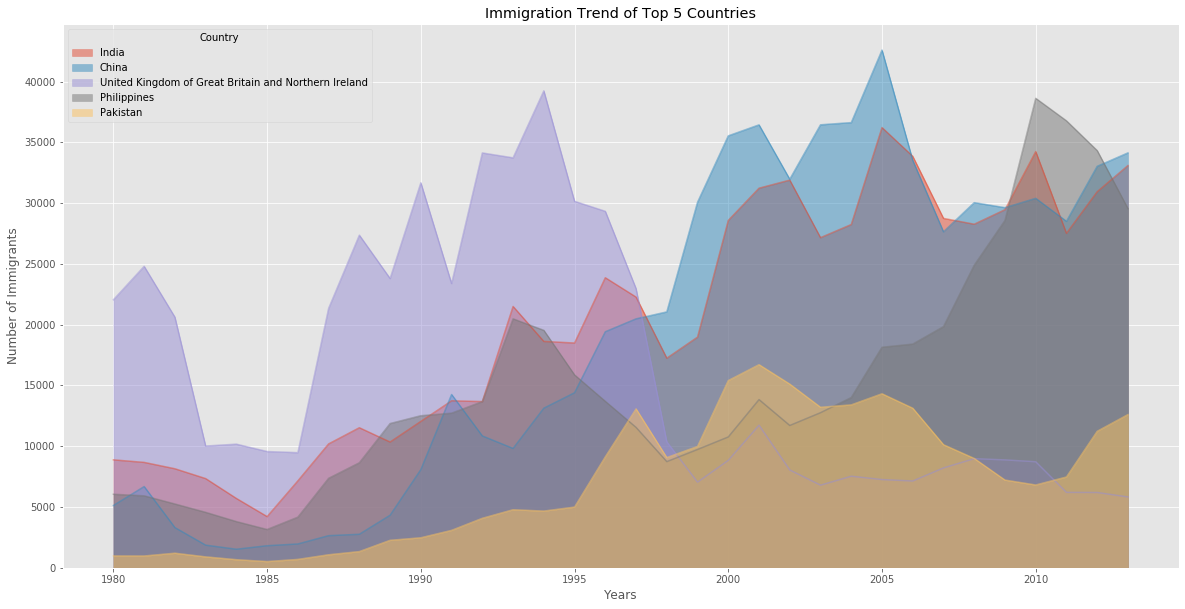

In [22]:
#our index values are as strings (since we changed all of our column names to strings)
#but for plotting now we want them as integers
df_top5.index=df_top5.index.map(int)

df_top5.plot(kind='area',
            stacked=False,
             figsize=(20,10), #otherwise graph will be too small to see the details
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Too dark to distinguish some of the overlaps? Try tweaking `alpha` from 0 to 1:

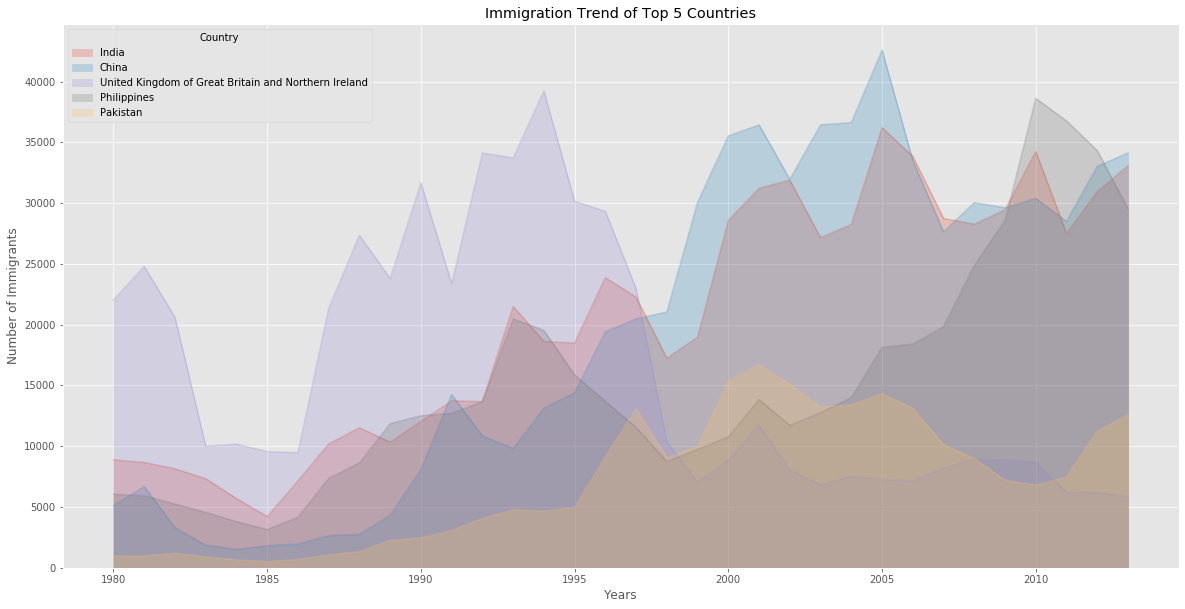

In [23]:
df_top5.plot(kind='area',
            stacked=False,
             alpha=0.25,
             figsize=(20,10), #otherwise graph will be too small to see the details
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Don't like the style of your plot? Try another one:

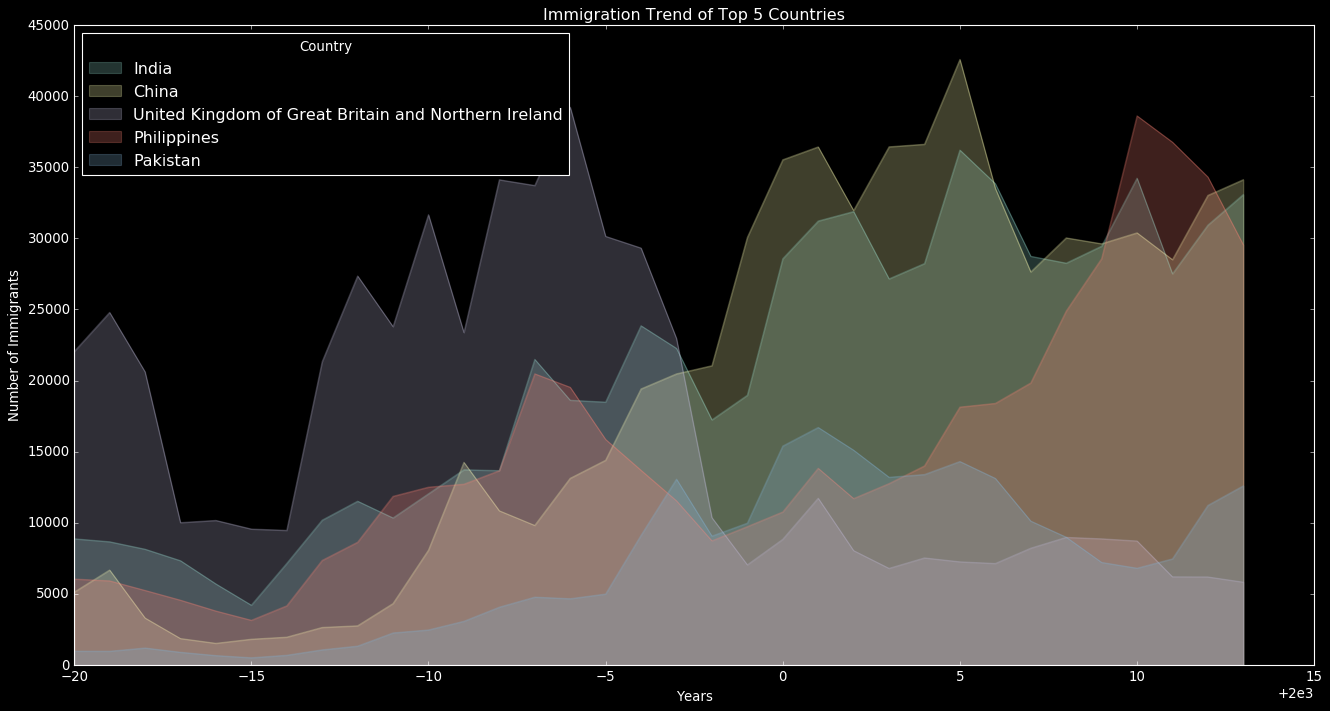

In [31]:
mpl.style.use('dark_background')

df_top5.plot(kind='area',
            stacked=False,
             alpha=0.25,
             figsize=(20,10), #otherwise graph will be too small to see the details
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

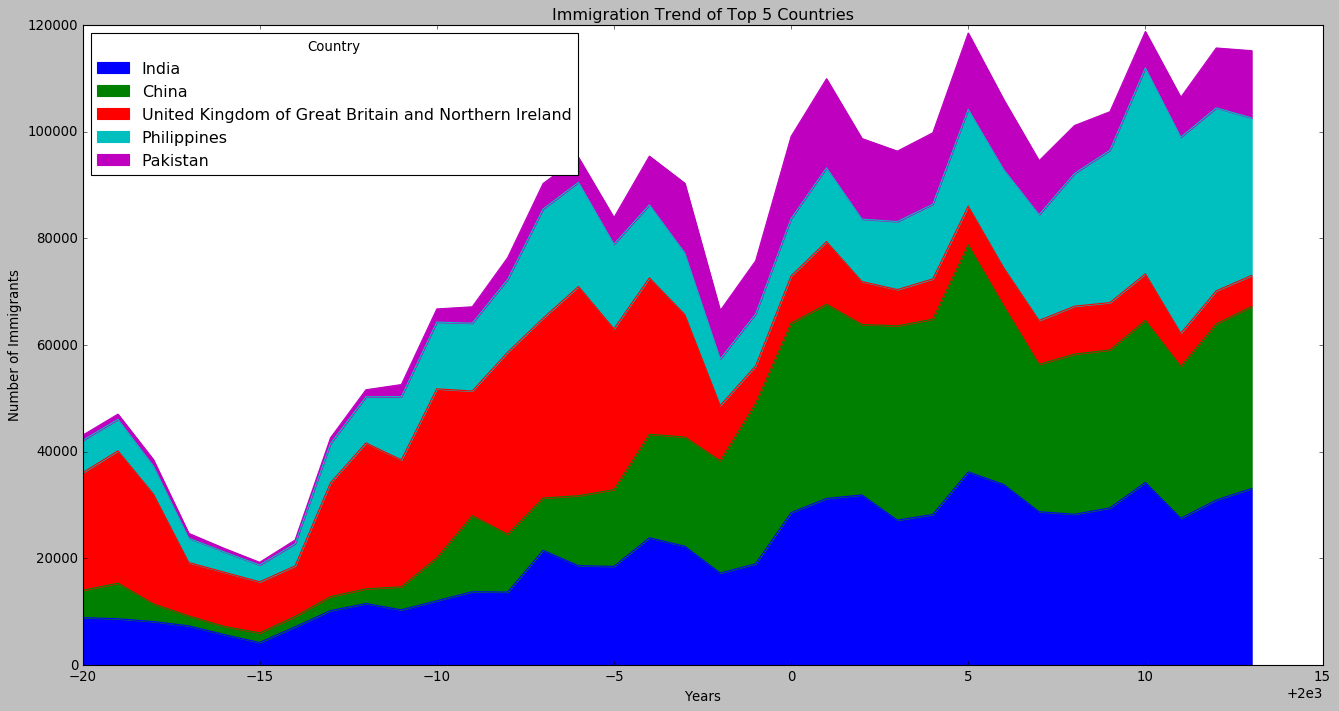

In [32]:
mpl.style.use('classic')

df_top5.plot(kind='area',
            stacked=True,
             figsize=(20,10), #otherwise graph will be too small to see the details
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Note: Stacked area plots are cumulative, thus, you can visualize how each category (in this case years) contributes to the total (all immigrations).

When plotting in *matplotlib* you can modify different layers of plotting. This was described in more detail in *Course Visualizing Data with Python MOD1*. Up to now we have been doing changes to the scripting layer. But we can also odify the artist layer. For example:

Text(0.5, 0, 'Years')

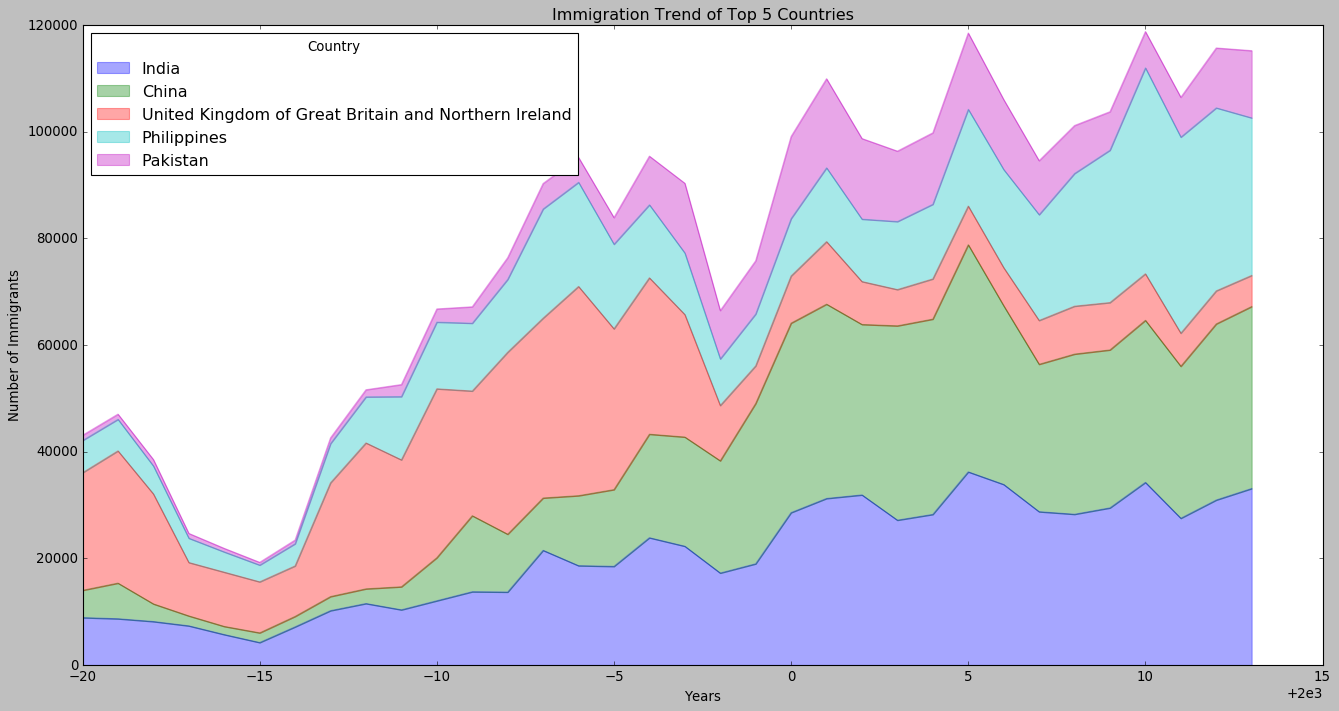

In [33]:
ax=df_top5.plot(kind='area',alpha=0.35,figsize=(20,10))
ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

Note: the style chosen for the matplotlib will also impact graphs plotted and modified with the artist layer.

### Histograms

These plots represent frequency distribution, with the x-axis partitioned into *bins* and each data point is assigned to a bin and the counts in each bin are displayed in the y-axis.

By default, the `histogram` method creates 10 *bins* from the data.

Let's look at the number of immigrants that went to Canada in 2013:

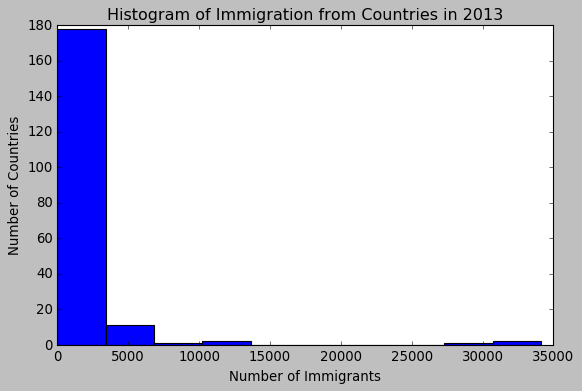

In [37]:
df_can['2013'].plot(kind='hist',figsize=(8,5)) #figsize must be in form of a tuple

plt.title('Histogram of Immigration from Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

Note: the x-axis does not show the size of the bins. Next we will fix this:

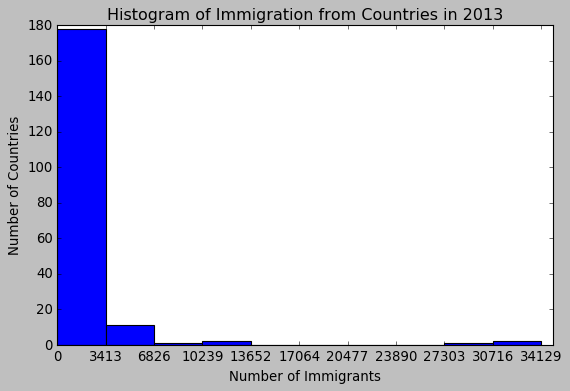

In [39]:
count,bin_edges=np.histogram(df_can['2013']) #makes list of bin intervals and counts from the histogram function

df_can['2013'].plot(kind='hist',figsize=(8,5),xticks=bin_edges)

plt.title('Histogram of Immigration from Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

This plot can also be made in another way. The type of plot to make can be specified as an argument or as a method:

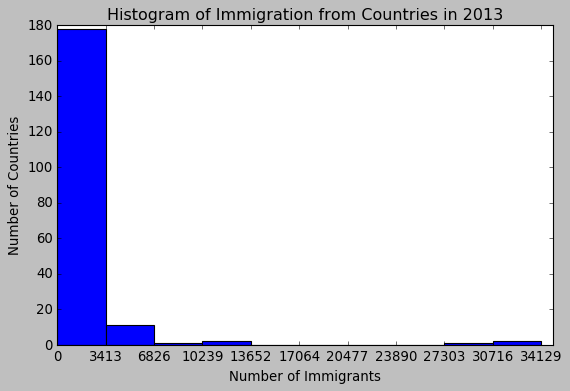

In [40]:
count,bin_edges=np.histogram(df_can['2013']) #makes list of bin intervals

df_can['2013'].plot.hist(figsize=(8,5),xticks=bin_edges)

plt.title('Histogram of Immigration from Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

What if we want to plot many histograms together to compare different contries?

First, let's make the dataframe that we would use:

In [41]:
df_can.loc[['Denmark','Norway','Sweden'],years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


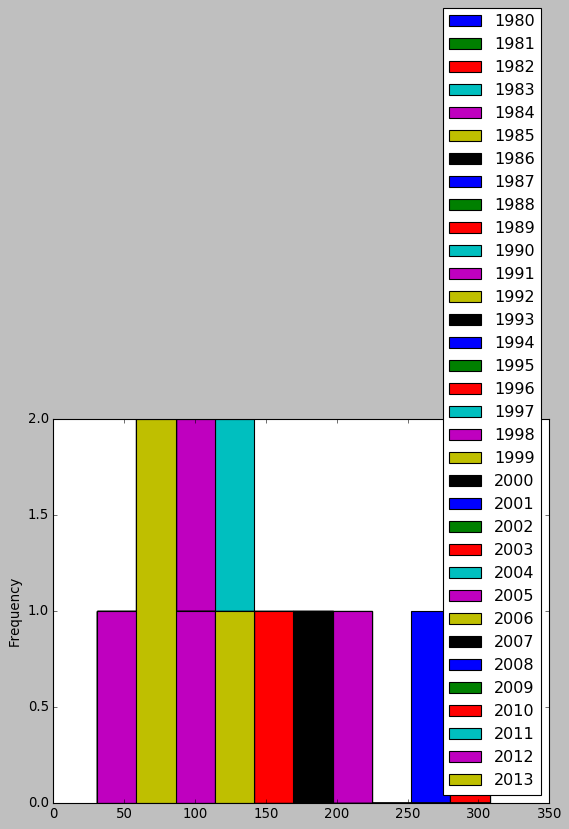

In [42]:
df_can.loc[['Denmark','Norway','Sweden'],years].plot.hist()

Note: problem, python tried to plot the years on the x-axis. To fix this, we need to transpose our data:

In [43]:
df_t=df_can.loc[['Denmark','Norway','Sweden'],years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


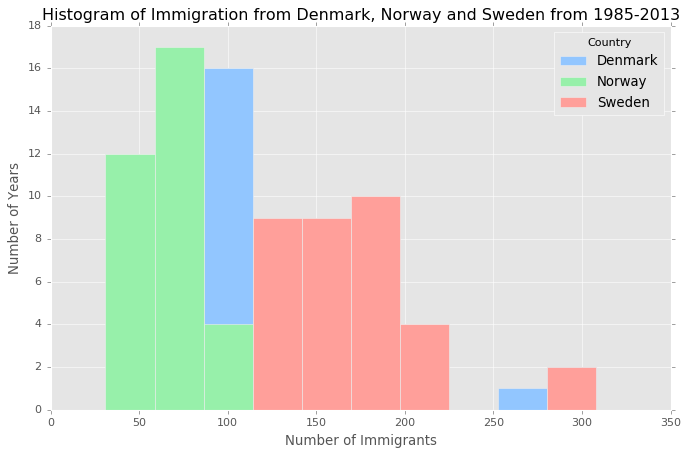

In [47]:
mpl.style.use('seaborn-pastel')

df_t.plot.hist(figsize=(10,6))

plt.title('Histogram of Immigration from Denmark, Norway and Sweden from 1985-2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

The colours in this plot makes it impossible to see the full spectrum of each year, so lets play with a few parameters:

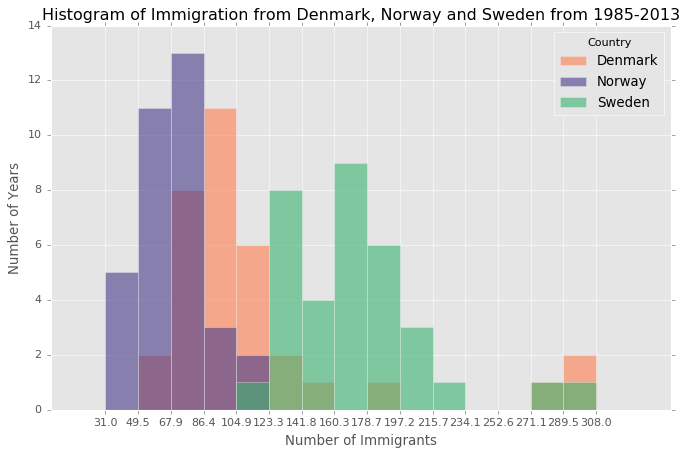

In [51]:
count,bin_edges=np.histogram(df_t,15) # here we are asigning two variables to the two results of the function histogram

df_t.plot(kind='hist',
         figsize=(10,6),
         bins=15,
         alpha=0.6,
          xticks=bin_edges, #required if you want the x-axis to be correctly showing the size of each bin
         color=['coral','darkslateblue','mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway and Sweden from 1985-2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Various different colours are available to use on matplotlib, find them out like this:

In [52]:
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name,hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


You can also change the size of the graphing area, and make your histogram stacked:

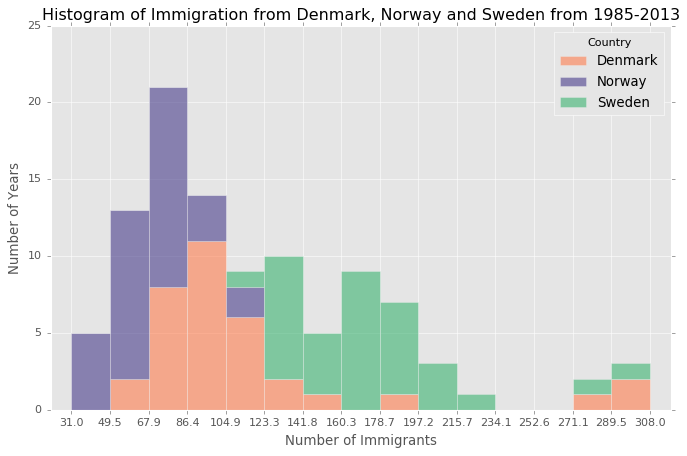

In [53]:
count,bin_edges=np.histogram(df_t,15) 
xmin=bin_edges[0] -10 #removing a buffer of 10 for aesthetics of the plot
xmax=bin_edges[-1]+10 #adding a buffer of 10 for aesthetics of the plot

df_t.plot(kind='hist',
         figsize=(10,6),
         bins=15,
         alpha=0.6,
          xticks=bin_edges, 
         color=['coral','darkslateblue','mediumseagreen'],
          stacked=True,
          xlim=(xmin,xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway and Sweden from 1985-2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

### Bar plots

Length of the bars represent the size or quantity of the variable or feature being analysed. They can show numerical or categorical data. In pyhton they can be plotten in pandas as:

- `kind=bar` for vertical bars
- `kind=barh` for horizontal bars

#### Vertical bar plots

X-axis has the labels, although the space can be limited, and the y-axis shows the magnitude of the feature being quantified. Often this type of graph is used for analysing time series.

Let's do an example of immigration from Iceland to Canada:

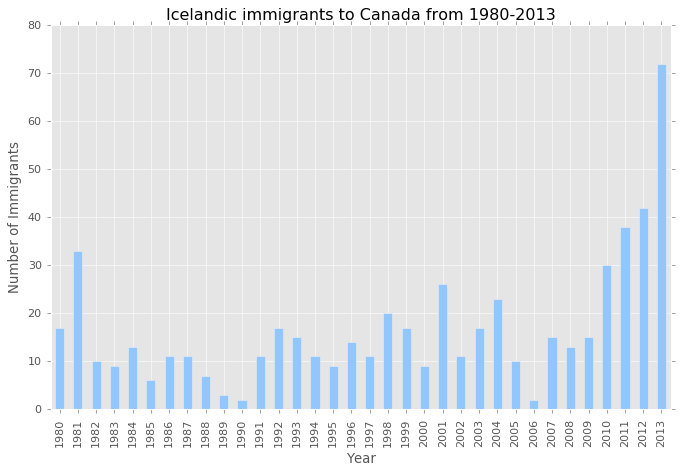

In [54]:
df_iceland=df_can.loc['Iceland',years]
df_iceland.plot(kind='bar',figsize=(10,6))
plt.title('Icelandic immigrants to Canada from 1980-2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

Iceland went through an economic depression in 2008-2011. The graphs shows that this caused a dramatic increase in immigration to Canada. Let's annotate this on the graph:

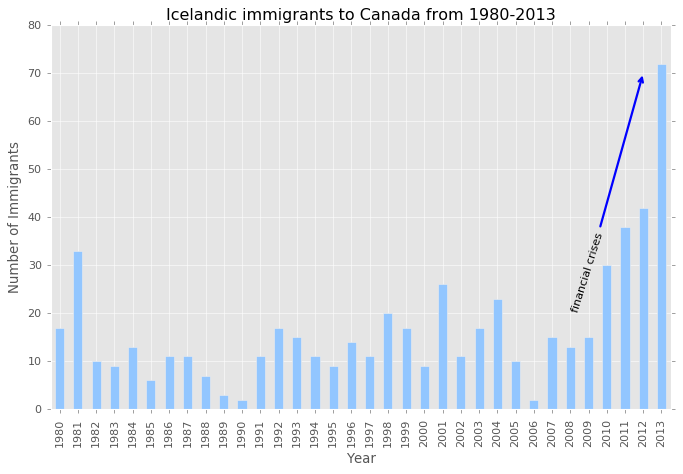

In [57]:
df_iceland=df_can.loc['Iceland',years]
df_iceland.plot(kind='bar',figsize=(10,6))

plt.annotate('financial crises',
            rotation=72.5, #trial and error angle for the text
            va='bottom', #want text to be vertically 'bottom' aligned
            ha='left', #want text to be horizontally 'left aligned'
            xy=(32,70), #place head of the arrow at this point
            xytext=(28,20), #place base of the arrow at this point
            xycoords='data', #will use the data plotted as the point of reference for the coordinates
            arrowprops=dict(arrowstyle='->',
                           connectionstyle='arc3', #straight line
                           color='blue',
                           lw=2 #line width
                           ) #dictionary of properties for drawing the arrow
            )


plt.title('Icelandic immigrants to Canada from 1980-2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

Note: here the text and arrow were done together, but you can also make two instances of annotation where in one you define just the arrow and in the other you define just the text.

#### Horizontal bar plots

This plot has the advantage that there is more space to label the categories being plotted.

Let's give it a try. Let's plot the top 15 countries with people immigrating to Canada form 1980-2013:

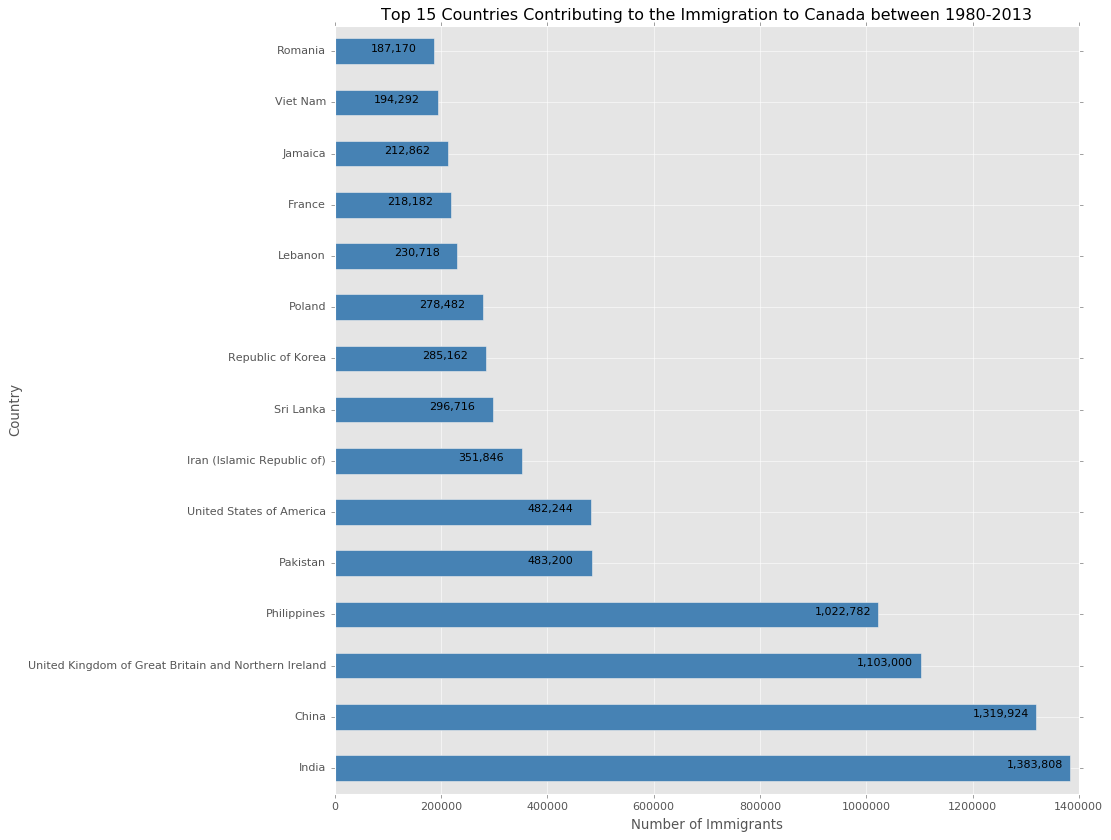

In [67]:
df_can.sort_values(by='Total',ascending=False,inplace=True) #organise the data in descending order

df_top15=df_can['Total'].head(15) #select the top 15 countries

df_top15=df_top15.transpose() #because we want to plot the countries on the y-axis

df_top15.plot(kind='barh', figsize=(12,12),color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Countries Contributing to the Immigration to Canada between 1980-2013')

#make loop to annotate values inside bars
for index, value in enumerate(df_top15):
    label=format(int(value),',')
    
    plt.annotate(label,xy=(value-120000, index-0.010),color='black') #trial and error to find value in which text fits inside the bars

plt.show()